# Regression: Linear and Non-Linear

## 1. Create new sets 

### a) A training set of the team data containing only the columns listed below and year in interval [2005, 2010]. Create a scatter matrix (pair plot) and heat map of this data and answer the following:

* Why might `ha` (hitting average) appear to be negatively correlated with `w` (wins)?
* If we wanted to predict `w` (wins), what might be the best three predictors to model first? Why?

**columns:** 

`['bb',
 'bpf',
 'cs',
 'double',
 'dp',
 'e',
 'h',
 'ha',
 'hr',
 'hra',
 'l',
 'ppf',
 'r',
 'ra',
 'sb',
 'sf',
 'so',
 'soa',
 'triple',
 'w',
 'year']`
 
### b) A merge of player and batting data containing only the columns listed below and year >= 2005

**columns**

`['ab',
 'r',
 'h',
 'double',
 'triple',
 'hr',
 'rbi',
 'sb',
 'cs',
 'bb']`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
team = pd.read_csv('team.csv')

In [3]:
team_cols = ['bb', 'bpf', 'cs', 'double', 'dp', 'e', 'h', 'ha', 'hr', 'hra', 'l',
             'ppf', 'r', 'ra', 'sb', 'sf', 'so', 'soa', 'triple', 'w', 'year']

team_train = team.loc[team.year.isin(np.arange(2005, 2011)), team_cols].reset_index(drop=True)

In [4]:
team_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 21 columns):
bb        180 non-null int64
bpf       180 non-null int64
cs        180 non-null float64
double    180 non-null int64
dp        180 non-null float64
e         180 non-null int64
h         180 non-null int64
ha        180 non-null int64
hr        180 non-null int64
hra       180 non-null int64
l         180 non-null int64
ppf       180 non-null int64
r         180 non-null int64
ra        180 non-null int64
sb        180 non-null float64
sf        180 non-null float64
so        180 non-null float64
soa       180 non-null int64
triple    180 non-null int64
w         180 non-null int64
year      180 non-null int64
dtypes: float64(5), int64(16)
memory usage: 29.6 KB


In [5]:
team_train.head()

bb  bpf    cs  double     dp    e     h    ha   hr  hra  ...   ppf    r  \
0  606  103  26.0     291  159.0   94  1419  1580  191  193  ...   105  696   
1  534  101  32.0     308  170.0   86  1453  1487  184  145  ...   100  769   
2  447   99  37.0     296  154.0  107  1492  1458  189  180  ...    99  729   
3  653  104  12.0     339  135.0  109  1579  1550  199  164  ...   104  910   
4  435  103  67.0     253  166.0   94  1450  1392  200  167  ...   103  741   

    ra     sb    sf      so   soa  triple   w  year  
0  856   67.0  45.0  1094.0  1038      27  77  2005  
1  674   92.0  46.0  1084.0   929      37  90  2005  
2  800   83.0  42.0   902.0  1052      27  74  2005  
3  805   45.0  63.0  1044.0   959      21  95  2005  
4  645  137.0  49.0  1002.0  1040      23  99  2005  

[5 rows x 21 columns]

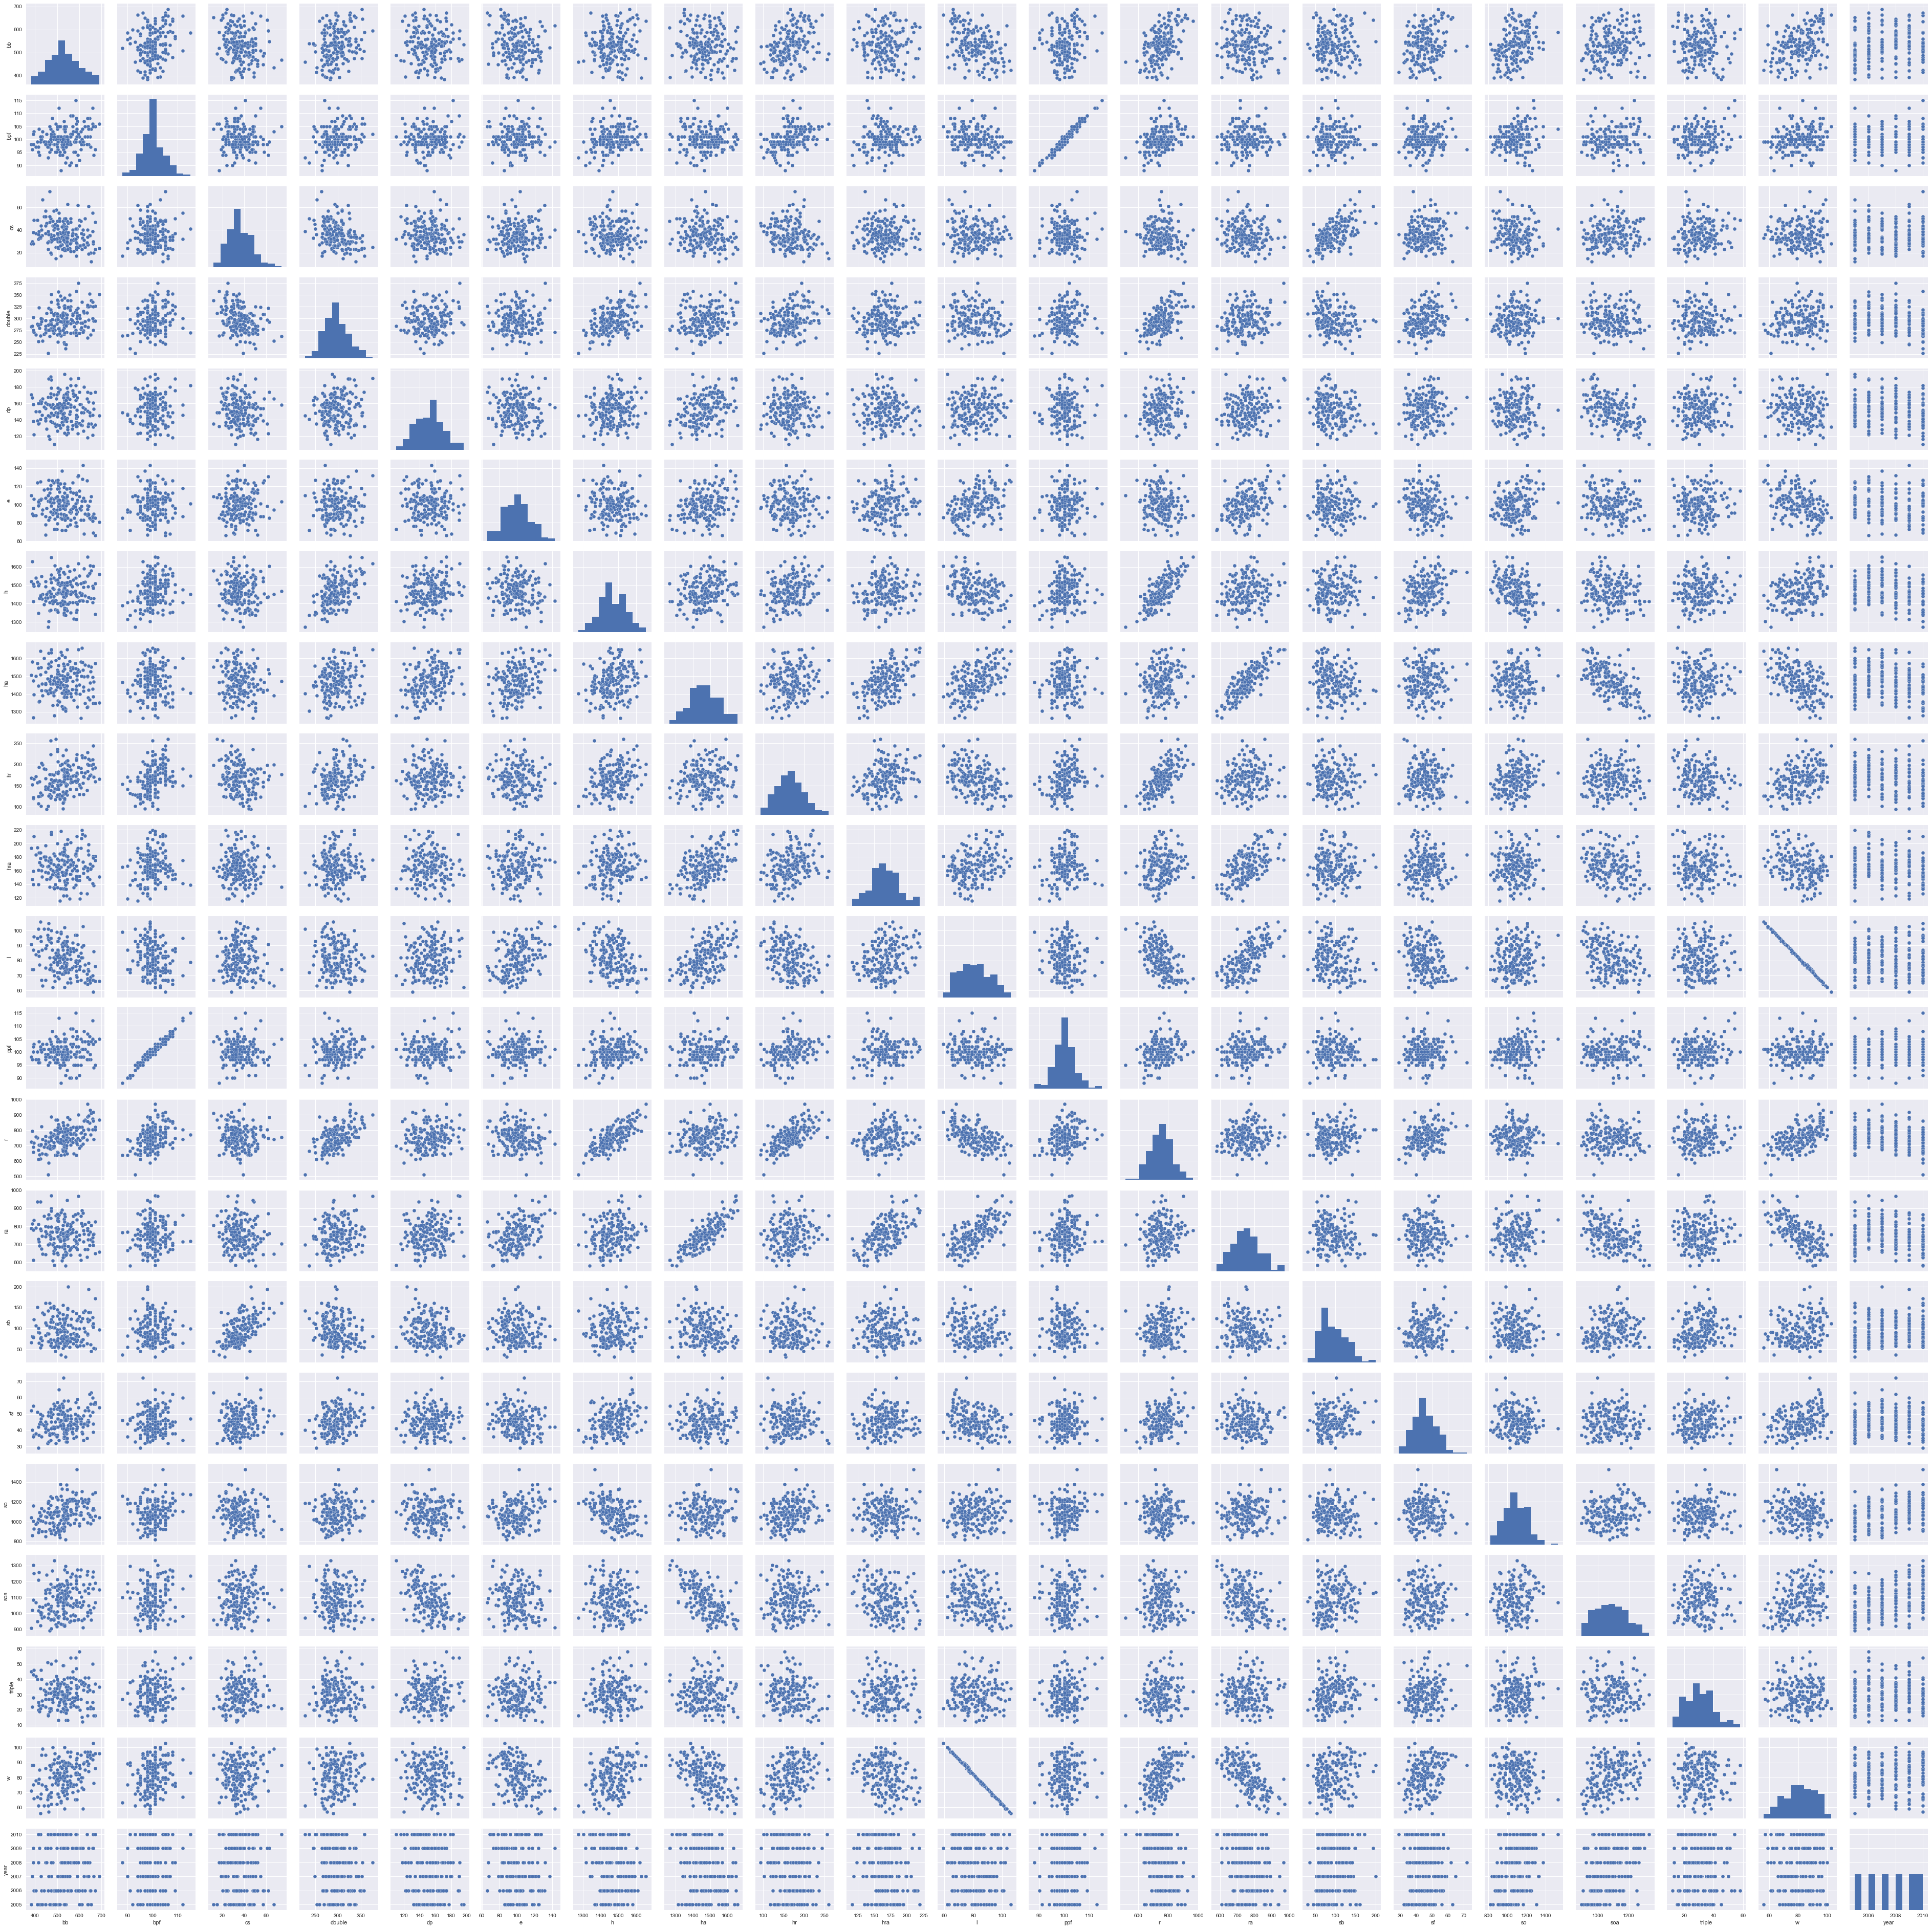

In [6]:
sns.pairplot(team_train);

According to the documentation `ha` is not hitting average but hits allowed, so it's a measure of how well the *other* team played.

It's only natural that it is negatively correlated with wins.

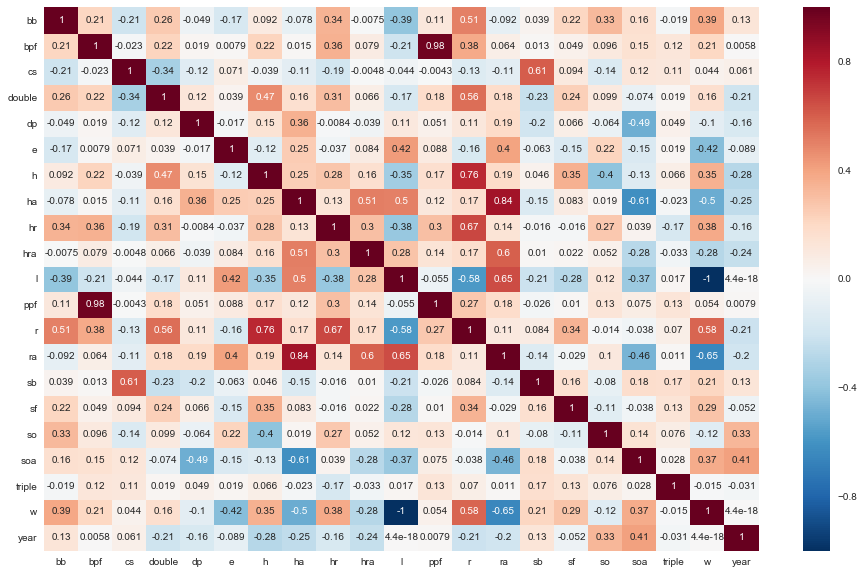

In [7]:
fig, ax = plt.subplots(figsize=(16, 10)) 
ax = sns.heatmap(team_train.corr(), annot=True);

Obviously losses has a correlation of -1 with wins, but I'm assuming that it can't be used to model wins. So I'm going with runs (`r`), runs allowed (`ra`) and a third feature which could be either errors (`e`) or hits allowed (`ha`); among the latter two I think errors is the best choice because the other is highly correlated to `ra`.

In [8]:
# A merge of player and batting data containing only the columns listed below and year >= 2005
player_batting_cols = ['ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb']

player = pd.read_csv('player.csv')
batting = pd.read_csv('batting.csv')

player_batting = pd.merge(left=player, right=batting, left_on='player_id', right_on='player_id')
player_batting = player_batting.loc[player_batting.year >= 2005, ['name_given', 'name_last', 'year'] + player_batting_cols]

In [9]:
player_batting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15349 entries, 1 to 101331
Data columns (total 13 columns):
name_given    15349 non-null object
name_last     15349 non-null object
year          15349 non-null int64
ab            15349 non-null float64
r             15349 non-null float64
h             15349 non-null float64
double        15349 non-null float64
triple        15349 non-null float64
hr            15349 non-null float64
rbi           15349 non-null float64
sb            15349 non-null float64
cs            15349 non-null float64
bb            15349 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 1.6+ MB


In [10]:
player_batting.head()

name_given name_last  year   ab    r    h  double  triple   hr  rbi   sb  \
1  David Allan   Aardsma  2006  2.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
2  David Allan   Aardsma  2007  0.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
3  David Allan   Aardsma  2008  1.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
4  David Allan   Aardsma  2009  0.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
5  David Allan   Aardsma  2010  0.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   

    cs   bb  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  
5  0.0  0.0

## 2. Using the OLS LinearRegression in the scikit-learn library
* Regress `r` onto `double` using the train set (create a linear model to predict `r` from `double`)
* What is the equation for the model? Interpret the slope.
* What is the $R^2$ value and what does it tell us?

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
# creating the model
OLS_1var = LinearRegression()
# creating training sets
X_1var = team_train.double.values.reshape(-1, 1)
y_1var = team_train.r.values.reshape(-1, 1)
# fitting the model
OLS_1var.fit(X_1var, y_1var)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# making predictions
y_1var_pred = OLS_1var.predict(X_1var)
print('Model equation is: y = {:.5f}x + {:.5f}'.format(float(OLS_1var.coef_), float(OLS_1var.intercept_)))

Model equation is: y = 1.55752x + 290.75819


The slope of the equation represents the rate of change of `r` with respect to `double`.

In [14]:
r2_score(y_1var, y_1var_pred)

0.31120469036164045

The $R^2$ value tells us what proportion of the variance in $y$ is predictable from $X$.

## 3. Plot the data points and the line of best fit. Create a residual plot for residuals vs the independent variable (`double`) in the model you just created and interpret it.
* Is the distribution of residuals random?
* Is there any heteroscedasticity?
* Would you say the data used in this model is well-suited to a linear model?

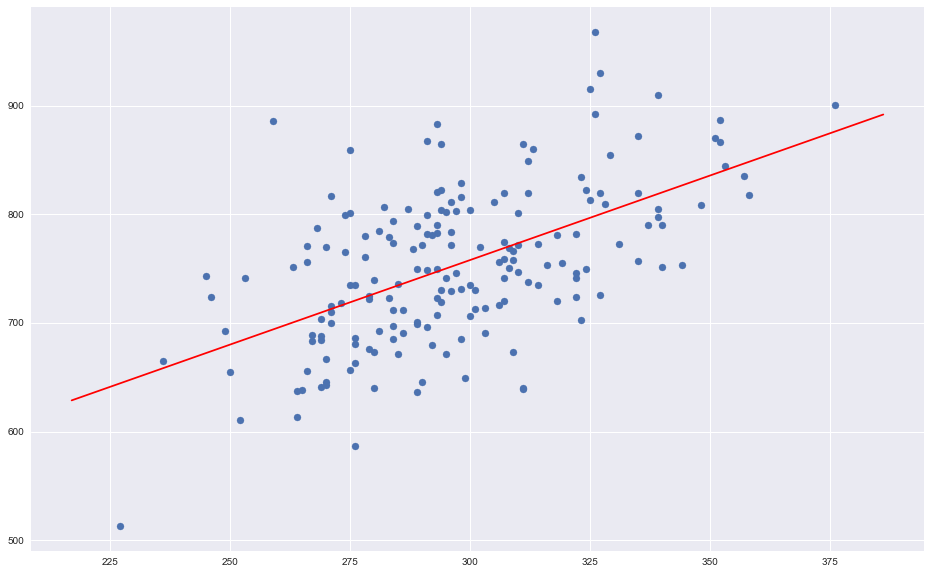

In [16]:
# data for the line plot
X_1var_plot = np.linspace(X_1var.min()-10, X_1var.max()+10, 1000)
y_1var_plot = OLS_1var.predict(X_1var_plot.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16, 10))
ax = plt.scatter(X_1var, y_1var)
ax = plt.plot(X_1var_plot, y_1var_plot, 'r')

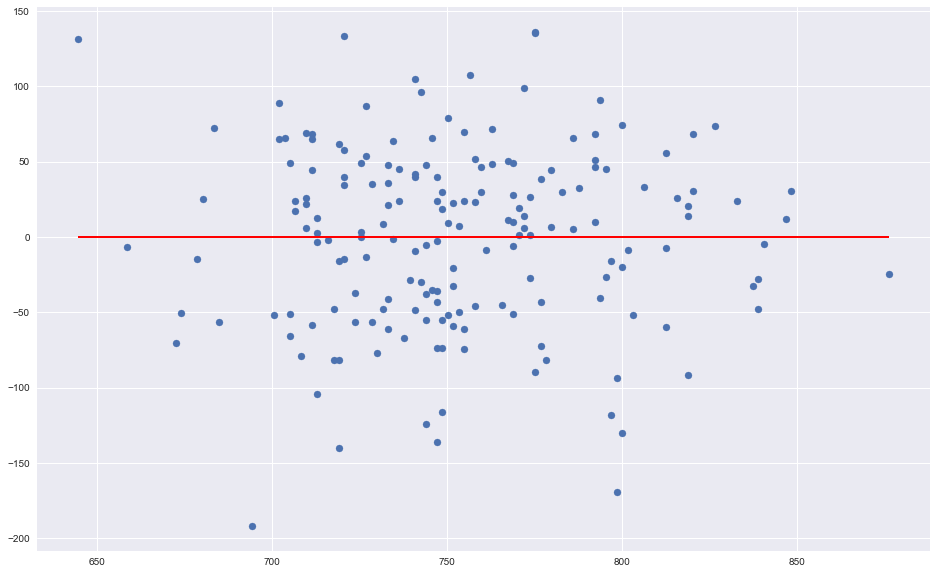

In [17]:
fig, ax = plt.subplots(figsize=(16, 10))
ax = plt.scatter(y_1var_pred, y_1var_pred - y_1var)
ax = plt.hlines(y=0, xmin=y_1var_pred.min(), xmax=y_1var_pred.max(), lw=2, color='red')

The residuals seems randomly distributed and there doesn't seem to be any recognizable pattern, so there is no heteroscedasticity.

The data presents a slight linearity but, as the $R^2$ score tells us, this is not a very good model.

## 4. Create one function that returns the standard error of the estimated parameters in a bivariate model, and create another that returns 95% confidence intervals for these parameters. Compute and interpret these intervals for the model above, then compute the t-stat and p-value for $\hat \beta_1$.

In [18]:
from scipy import stats

In [21]:
# just a reminder for me:
# this is the interval for 0.95 confidence and 5 df
t = stats.t.interval(alpha=0.95, df=5)
print(t)
# this is the probability of being under the t-value with 5 df
print(stats.t.cdf(2.57058, df=5))
# this is the inverse of the above: what is the t-value you have probability x of being under with 5 df?
print(stats.t.ppf(0.975, df=5))
# I don't really remember what this is...
stats.t.sf(x=np.abs(t), df=5)*2

(-2.5705818366147395, 2.5705818366147395)
0.974999944311
2.57058183661


array([ 0.05,  0.05])

In [22]:
def standard_error(model, X, y):
    MSE = ((model.predict(X) - y)**2).mean()
    return np.sqrt(MSE * np.linalg.inv(X.T.dot(X)))

def conf_intervals(model, X, y, alpha=0.05):
    se = standard_error(model, X, y)
    n = len(X)
    k = len(model.coef_)
    # t-value for half of 1 minus the desired alpha (two-tailed interval)
    t_val = stats.t.ppf(1-alpha/2, df=n-(k+1))
    return model.coef_ - se * t_val, model.coef_ + se * t_val

# 95% confidence interval for previous model
# I'm missing the intercept...
print(conf_intervals(OLS_1var, X_1var, y_1var))

# t-stat and p-value for previous model slope
t_stat = OLS_1var.coef_ / standard_error(OLS_1var, X_1var, y_1var)
p_val = stats.t.sf(x=t_stat, df=178)

print('t-stat: {:.5f}\np-value: {:.5f}'.format(float(t_stat), float(p_val)))

(array([[ 1.52798695]]), array([[ 1.58705744]]))
t-stat: 104.06497
p-value: 0.00000


## 5. Create a RANSAC model for the same data used in question 2, and compare it's R-squared value to the first model. Be sure to get the indices of inliers

In [23]:
from sklearn.linear_model import RANSACRegressor
# create the RANSAC model
ransac = RANSACRegressor(
                        LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        loss='absolute_loss',
                        residual_threshold=5.0,
                        random_state=0)

# fit the model
ransac.fit(X_1var, y_1var)
# make predictions
ransac_pred = ransac.predict(X_1var)

print('Slope: {:.5f}'.format(float(ransac.estimator_.coef_)))
print('Intercept: {:.5f}'.format(float(ransac.estimator_.intercept_)))
print('R2 score: {:.5f}'.format(r2_score(y_1var, ransac_pred)))

# get the inliers mask
inliers = ransac.inlier_mask_
print(X_1var[inliers][:5])

Slope: 1.39127
Intercept: 334.92861
R2 score: 0.30249
[[279]
 [271]
 [309]
 [297]
 [357]]


## 6. Create a linear model to predict `r` using both `double` and `h` as predictors, and do the following
* Interpret the parameters and give the $R^2$ value.
* Is there any problem with the two predictors together in this model?
* Create a 3D plot that shows the data points for both actual and predicted values for `r`.

In [24]:
X_2var = team_train[['double', 'h']]
y_2var = team_train.r.values.reshape(-1, 1)

OLS_2var = LinearRegression()
OLS_2var.fit(X_2var, y_2var)

print('Coefficients: {}'.format(OLS_2var.coef_))
print('Intercept: {:.5f}'.format(float(OLS_2var.intercept_)))

print('Correlation between coefficients:\n{}'.format(X_2var.corr()))

y_2var_pred = OLS_2var.predict(X_2var)

print('R2 score: {:.5f}'.format(r2_score(y_2var, y_2var_pred)))

Coefficients: [[ 0.71934416  0.62245511]]
Intercept: -373.68216
Correlation between coefficients:
        double       h
double  1.0000  0.4739
h       0.4739  1.0000
R2 score: 0.62239


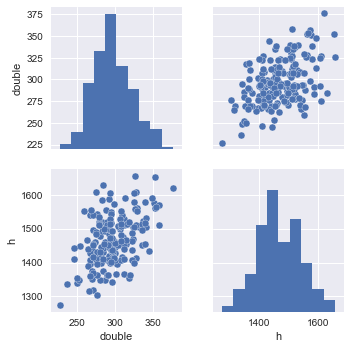

In [25]:
sns.pairplot(X_2var);

The two parameters presents a small linear relationship, so there may be some correlation in the features causing problems in the model.

In [26]:
from mpl_toolkits import mplot3d

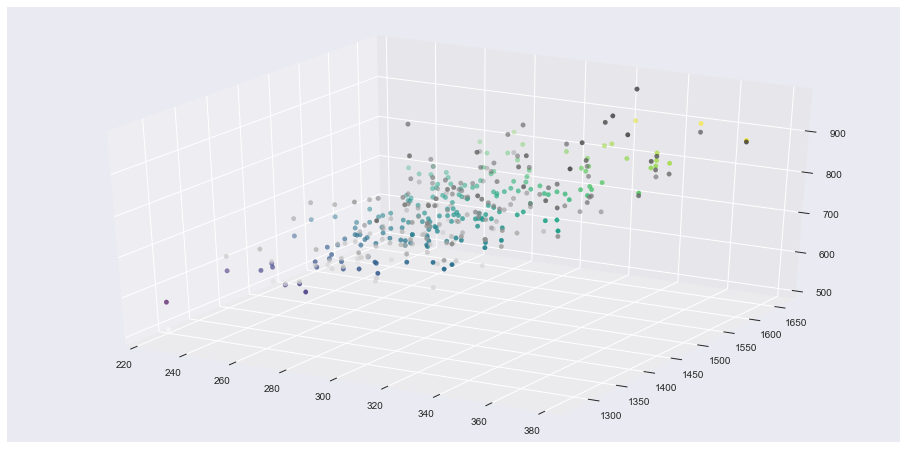

In [27]:
# plotting the points
fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_2var.double, X_2var.h, y_2var, c=y_2var)
ax.scatter3D(X_2var.double, X_2var.h, y_2var_pred, c=y_2var_pred, cmap='viridis');

## 7. Create a multiple regression model to predict `r` using the variables listed below as predictors, and determine the $R^2$ value. Print all parameter values along with their corresponding variable names.

`['bb','bpf','double','dp','e','h','ha','hra','ppf','ra','sb','sf','triple']`

In [28]:
# model features
mult_regr_cols = ['bb', 'bpf', 'double', 'dp', 'e', 'h', 'ha', 'hra', 'ppf', 'ra', 'sb', 'sf', 'triple']
# create training sets
X_multvar = team_train[mult_regr_cols]
y_multvar = team_train.r.values.reshape(-1, 1)
# fit model
OLS_multvar = LinearRegression()
OLS_multvar.fit(X_multvar, y_multvar)
# print parameters and intercept
for i, col in enumerate(mult_regr_cols):
    print('Coefficient for {} is: {}'.format(col, OLS_multvar.coef_[0][i]))

print('Intercept: {:.5f}'.format(float(OLS_multvar.intercept_)))

# predict and print R2
y_multvar_pred = OLS_multvar.predict(X_multvar)
print('R2 score: {:.5f}'.format(r2_score(y_multvar, y_multvar_pred)))

Coefficient for bb is: 0.32532424691943296
Coefficient for bpf is: 18.846529117352258
Coefficient for double is: 0.4397304479295745
Coefficient for dp is: 0.17870078320113036
Coefficient for e is: 0.03940524716282212
Coefficient for h is: 0.5194200382940695
Coefficient for ha is: 0.11292488964728964
Coefficient for hra is: 0.3305064938706632
Coefficient for ppf is: -17.039926128845746
Coefficient for ra is: -0.05576480937751427
Coefficient for sb is: 0.14319056188560886
Coefficient for sf is: -0.18307152600088283
Coefficient for triple is: 0.1927186886122314
Intercept: -715.03548
R2 score: 0.82876


## 8. Create a test set that includes all years >= 2011 and create a set of predictions from this data. Compute the MSE and RMSE for the model above using scikit-learn. Create your own function to compute these scores and compare your outputs to scikit's, and interpret the RMSE.

In [29]:
# create the test dataframe
team_test = team.loc[team.year >= 2011, team_cols].reset_index(drop=True)

In [30]:
# create test sets
X_test = team_test[mult_regr_cols]
y_test = team_test.r.values.reshape(-1, 1)
# make predictions
y_test_pred = OLS_multvar.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
# using scikit-learn
print('MSE: {:.5f}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

MSE: 1554.25499
RMSE: 39.42404


In [32]:
def MSE(y, pred):
    return ((y - pred)**2).mean()

def RMSE(y, pred):
    return np.sqrt(((y - pred)**2).mean())
# using my functions
print('MSE: {:.5f}'.format(MSE(y_test, y_test_pred)))
print('RMSE: {:.5f}'.format(RMSE(y_test, y_test_pred)))

MSE: 1554.25499
RMSE: 39.42404


The RMSE tells us how much on average the predictions differ from the real values.

## 9. The RMSE computed in the last problem doesn't actually tell us much by itself. Is +/- 39.4 runs a small error, or a really large error? Come up with a solution to this problem and report/interpret the new result.

We could use the error percentage, obtained dividing the RMSE by the mean value of y (since the RMSE is in the same units as the values being predicted); this gives us an error of about 6%.

In [33]:
RMSE(y_test, y_test_pred) / y_test.mean()

0.057700473432857162

## Optional Exercises

## 10. Create and run a function to select the best subset from the current data using k-fold CV, and based on RMSE on test sets. Do not use any functions from scikit-learn. The function need only return the list of best features and the best score, and should use only simple forward selection.

In [34]:
def k_fold(model, X, y, k):
    '''calculate the meand RMSE for a model using k-fold'''
    # lenght of a single partition
    n = len(X) // k
    # transforming the dataframe in an array
    X_arr = np.array(X.values)
    score = []
    # for every partition we split the data in train and test sets, fit the model and evaluate
    for i in range(n):
        # the first (i-1)-th partions and the last n-(i+1)-th
        Xtrain = np.vstack((X_arr[0:i*k, :], X_arr[(i+1)*k:, :]))
        # the i-th partition
        Xtest = X_arr[i*k:(i+1)*k, :]
        ytrain = np.vstack((y[0:i*k, :], y[(i+1)*k:, :]))
        ytest = y[i*k:(i+1)*k, :]
        model.fit(Xtrain, ytrain)
        curr_score = RMSE(ytest, model.predict(Xtest))
        score.append(curr_score)
    # returning the mean score
    return np.array(score).mean()

All of this is just to verify that all this kfold CV stuff makes sense (and that my functions are somewhat correct):

In [35]:
# choose some columns
cols_1 = ['bb', 'bpf', 'double', 'dp', 'e', 'h', 'ha', 'hra', 'ppf', 'ra', 'sb', 'sf', 'triple']
# create training set
X_kfold_1 = team_train[cols_1]
y_kfold_1 = team_train.r.values.reshape(-1, 1)
# perform kfold CV on it and see the result
OLS_kfold = LinearRegression()
k_fold(OLS_kfold, X_kfold_1, y_kfold_1, 5)

30.961743820507667

In [36]:
# train regression on all the data
OLS_kfold.fit(X_kfold_1, y_kfold_1)
# and test it on test data to see the RMSE
X_kfold_1_test = team_test[cols_1]
y_kfold_1_test = team_test.r.values.reshape(-1, 1)
RMSE(y_kfold_1_test, OLS_kfold.predict(X_kfold_1_test))

39.424040807911098

In [37]:
# again on other columns
cols_2 = ['bb', 'bpf', 'double', 'dp', 'e', 'h', 'ha', 'hra', 'ppf']
# training set and kfold CV
X_kfold_2 = team_train[cols_2]
y_kfold_2 = team_train.r.values.reshape(-1, 1)
k_fold(OLS_kfold, X_kfold_2, y_kfold_2, 5)

30.63794636543934

This has a best CV score so it should perform better on the test set:

In [38]:
# again training on all data
OLS_kfold.fit(X_kfold_2, y_kfold_2)
# and testing it on test set
X_kfold_2_test = team_test[cols_2]
y_kfold_2_test = team_test.r.values.reshape(-1, 1)
RMSE(y_kfold_2_test, OLS_kfold.predict(X_kfold_2_test))

39.390007566525419

Ditto, the RMSE is slightly better on unseen data!

Now all I have to do is forward selection:

In [39]:
def add_one_feature(model, X, y, selected_features, additional_features, k=5):
    '''given a model, the current features and the reamining ones,
    it returns the best score and best features obtained adding 1 feature.
    It uses k-fold validation to determine the best set'''
    best_score = -1
    best_features = []
    for feature in additional_features:
        # initialize the features by adding one of the remaining ones
        curr_features = selected_features + [feature]
        # selecting data and performing k-fold CV
        curr_X = X[curr_features]
        curr_score = k_fold(model, curr_X, y, k)
        # eventually updating the best scores and features
        if best_score == -1:
            best_score = curr_score
            best_features = curr_features
        elif best_score >= curr_score:
            best_score = curr_score
            best_features = curr_features    
    return best_score, best_features

def forward_sel(model, X, y, features, k=5):
    '''performs forward selection on the list of features determining the best set using k-fold CV'''
    best_score = -1
    best_features = []
    # we keep track of the best set of features for each i in order to keep forward selection going on
    last_i_best_features = []
    for i in range(len(features)):
        # get the features yet to be processed by difference between all the features and the last best ones
        additional_features = list(set(features) - set(last_i_best_features))
        # calculating best score and i+1 fetures
        curr_score, curr_features = add_one_feature(model, X, y, last_i_best_features, additional_features, k)
        # updating last best set of features and eventually best score and features
        last_i_best_features = curr_features
        if best_score == -1:
            best_features = curr_features
            best_score = curr_score
        elif best_score >= curr_score:
            best_features = curr_features
            best_score = curr_score
    return best_score, best_features

In [40]:
# choose some columns
cols_forw = ['bb', 'bpf', 'double', 'dp', 'e', 'h', 'ha', 'hra', 'ppf', 'ra', 'sb', 'sf', 'triple']
# create training set
X_forw = team_train[cols_forw]
y_forw = team_train.r.values.reshape(-1, 1)
# perform forward selection on it and see the result
OLS_forward_sel = LinearRegression()
best_score, best_features = forward_sel(OLS_forward_sel, X_forw, y_forw, cols_forw)
print(best_score, best_features)

30.4125952229 ['h', 'bb', 'double', 'bpf', 'ppf', 'ha', 'hra', 'sb']


And it does slightly better than the ones above... Wow, seems like it's working pretty well!

In [41]:
# train regression on all the data
X_forw = team_train[best_features]
OLS_forward_sel.fit(X_forw, y_forw)
# and test it on test data to see the RMSE
X_forw_test = team_test[best_features]
y_forw_test = team_test.r.values.reshape(-1, 1)
RMSE(y_forw_test, OLS_forward_sel.predict(X_forw_test))

39.312801031266886

## 11. Model the same data as in (7), only this time compare the previous results to a Lasso model using the Lasso class from scikit-learn. Then use the LassoCV with 10-fold CV to determine alpha and compare results again.

In [42]:
from sklearn.linear_model import Lasso, LassoCV
# create and train model
lasso = Lasso(alpha=0.1, normalize=True, max_iter=1000, random_state=42)
lasso.fit(X_multvar, y_multvar)
# predict and calculate R2 score
lasso_pred = lasso.predict(X_multvar)
r2_score(y_multvar, lasso_pred)
# previous r2 score: 0.8287621915536203

0.80298681217159795

In [43]:
lasso.coef_

array([ 0.38928406,  1.88312309,  0.41301399,  0.09175707, -0.06360244,
        0.58451947,  0.        ,  0.18685936, -0.        , -0.01227897,
        0.1309059 ,  0.        ,  0.        ])

In [44]:
lasso_pred_test = lasso.predict(X_test)
RMSE(y_test, lasso_pred_test)

# previous RMSE: 39.4240408079

91.704234664387286

$R^2$ is better but RMSE is not, something isn't right...

In [45]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=1000, normalize=True, random_state=42)
lassocv.fit(X_multvar, y_multvar.ravel())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
    verbose=False)

Also, the RMSE for the alpha determined by CV is higher than the alpha randomly chosen...

In [46]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_multvar, y_multvar)
RMSE(y_test, lasso.predict(X_test))

94.096747242078692

## 12. Create a scatter matrix of the merged set "`data`". Take note of the curvature of the `r` - `h` pair. Model `r` as a polynomial function of `h`, and compare this to a linear model using the Standard Error of the Regression (S).
*We should not use $R^2$ for non-linear models!*

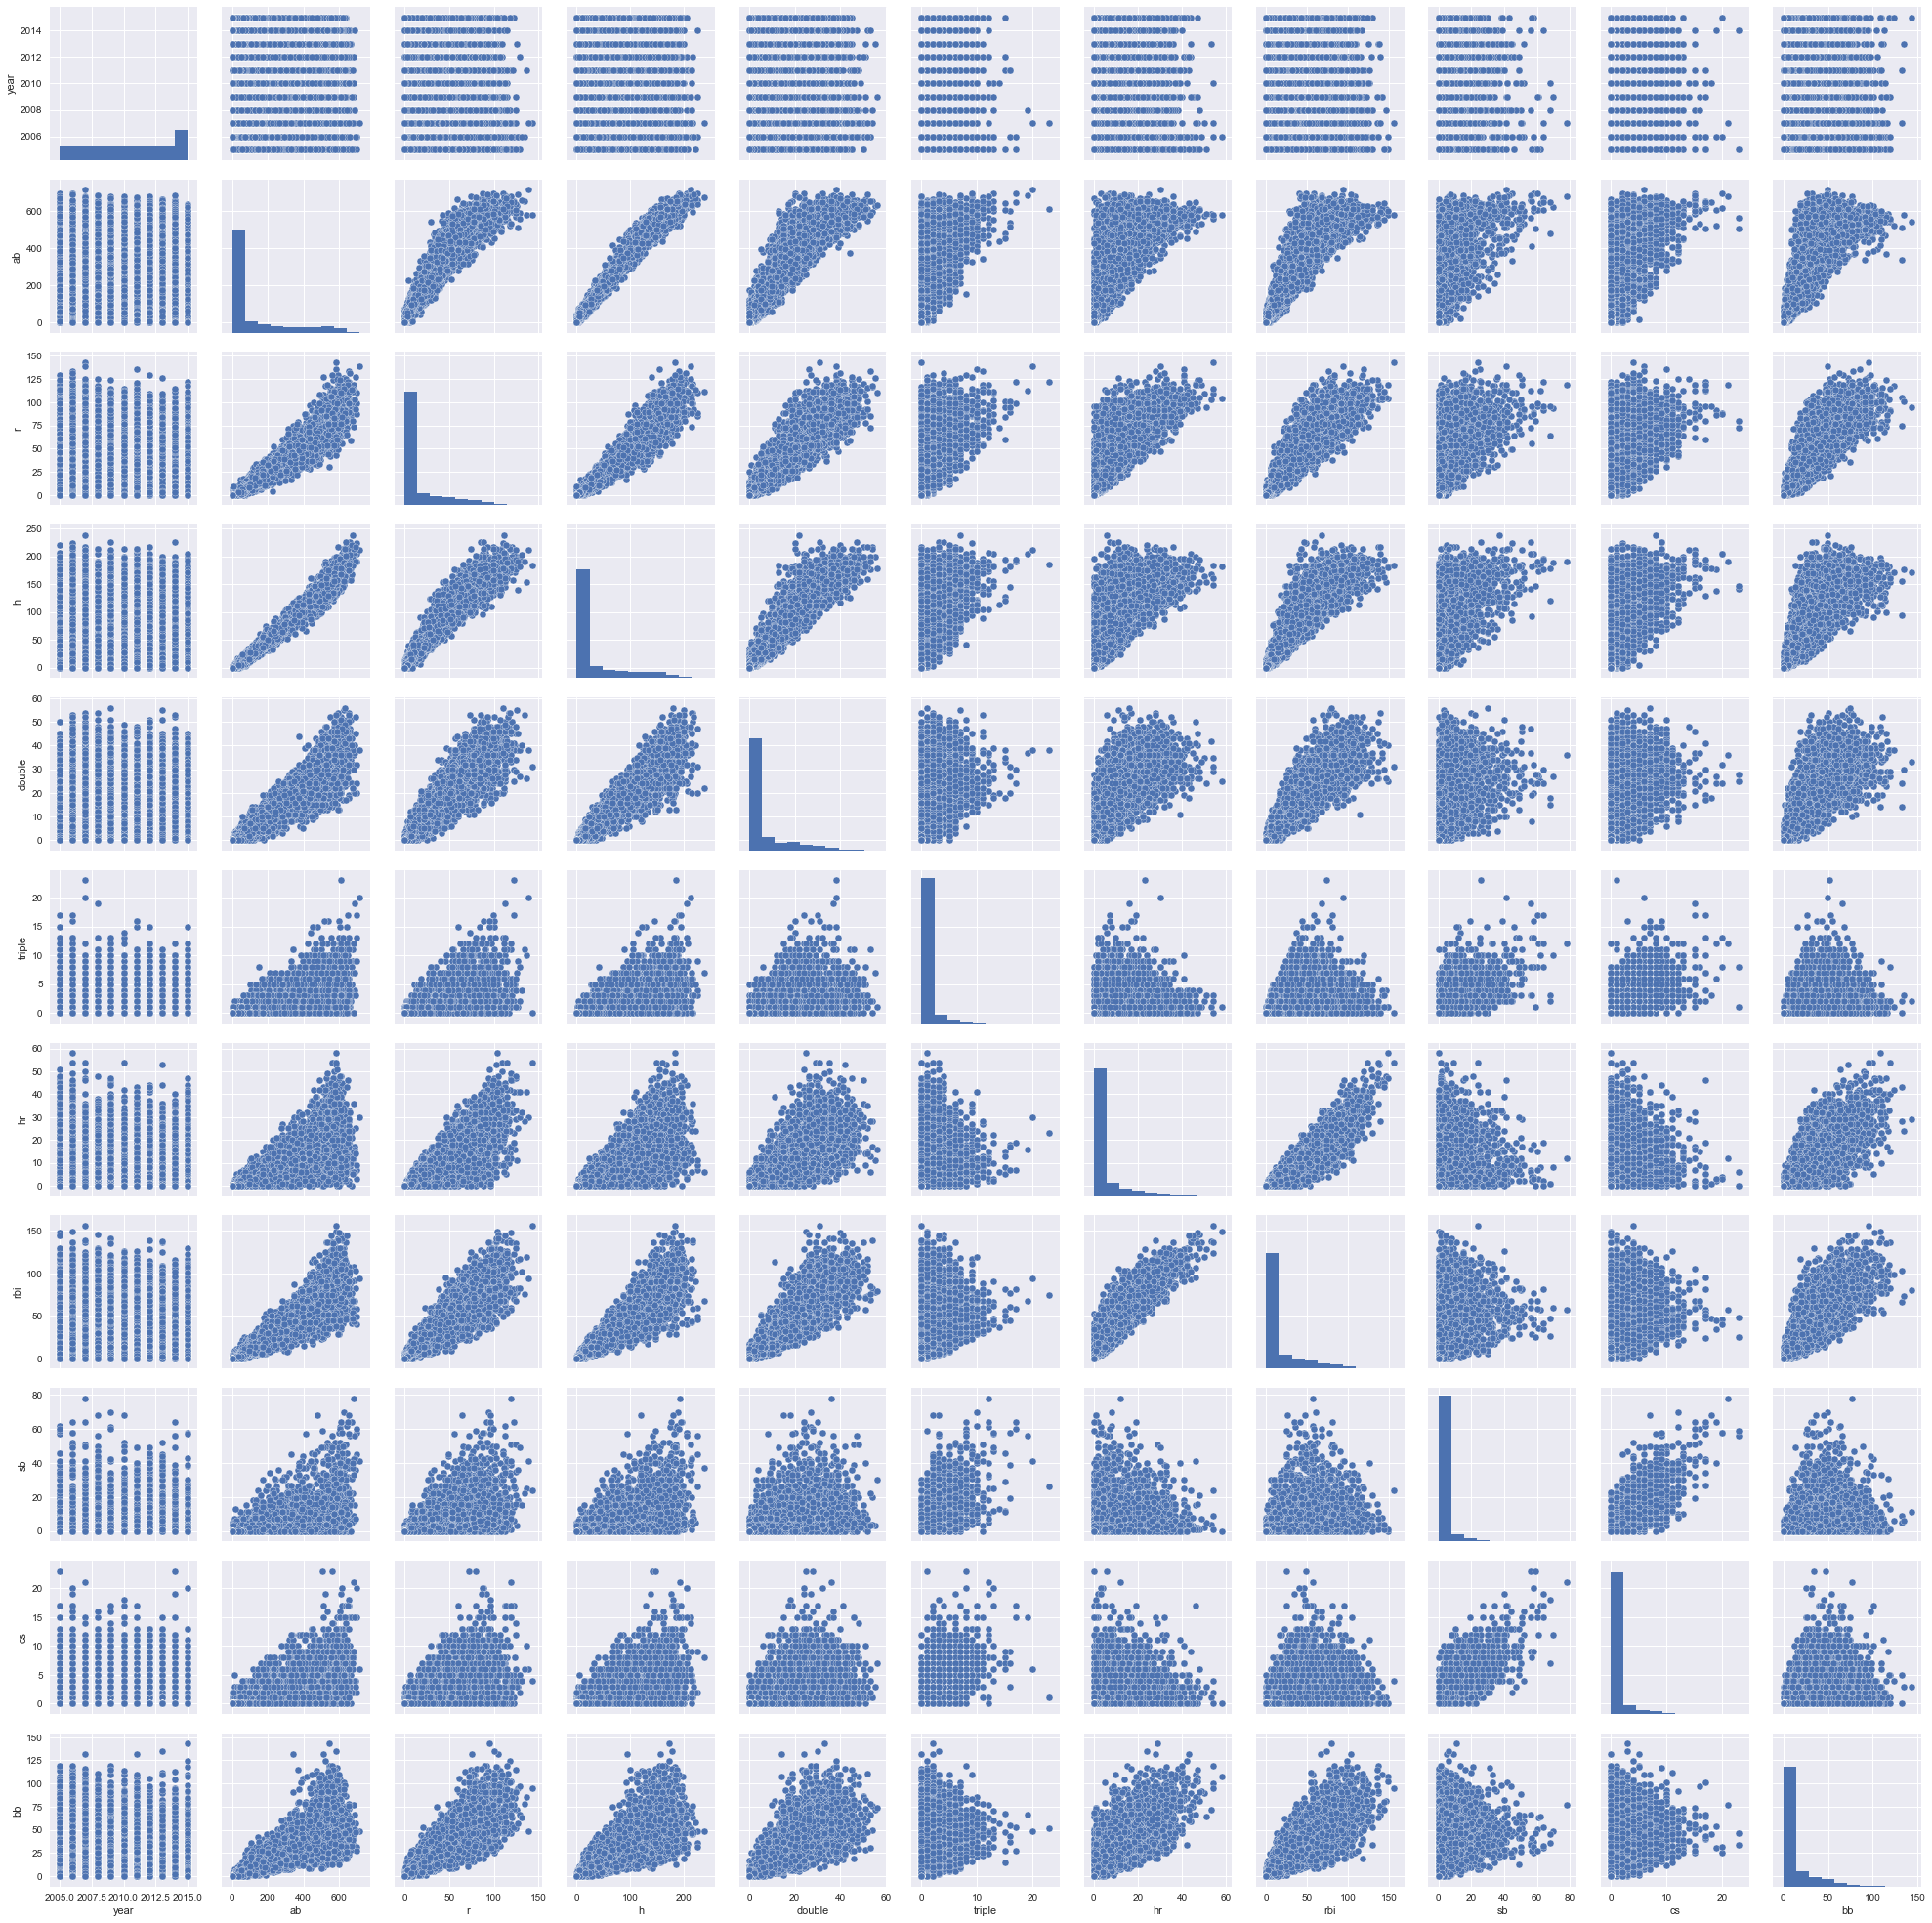

In [47]:
sns.pairplot(player_batting);

Here we take a better look at the relationship between `h` and `r`. There seems to be a quadratic relationship or more, maybe I can use a third or fourth grade polynomial.

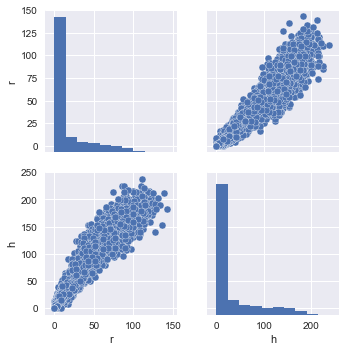

In [48]:
sns.pairplot(player_batting[['r', 'h']]);

In [49]:
from sklearn.preprocessing import PolynomialFeatures

# creating the model
OLS_poly = LinearRegression()
# creating training sets
X_poly = player_batting.h.values.reshape(-1, 1)
y_poly = player_batting.r.values.reshape(-1, 1)

# create polynomial features
fourth = PolynomialFeatures(degree=4)
X_fourth = fourth.fit_transform(X_poly)

# linear model comparison training, predicting and scoring
OLS_poly_comp = LinearRegression()
OLS_poly_comp.fit(X_poly, y_poly)
y_poly_test_pred = OLS_poly_comp.predict(X_poly)
print(r2_score(y_poly, y_poly_test_pred))

# fit features and predict
OLS_poly.fit(X_fourth, y_poly)
y_fourth_pred = OLS_poly.predict(X_fourth)
print(r2_score(y_poly, y_fourth_pred))

0.955507689874
0.956081613704


In [50]:
# S is the same as RMSE, so I'll reuse my previous function
print(RMSE(y_poly, y_poly_test_pred))
print(RMSE(y_poly, y_fourth_pred))

5.48829992772
5.45278716168


$S$ is another name for RMSE, and you can see that $R^2$ tells us that the linear model is better but $S$ gives us the opposite result.